# lorapy testing notebook 

In [10]:
%load_ext autoreload
%autoreload 2

import pathlib

import os, sys
from loguru import logger
logger.remove(None)
logger.add(sys.stdout, colorize=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


3

## setup 

In [11]:
DEADEND_DATA_DIR = '/Users/trevor/Work/1-projects/lora-processing/data/dead-end'

DATA_DIR = '/Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor'
DATA_DIR_PLIB = pathlib.Path('/Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor')

DATA_FILE = '/Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor/lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat'
DATA_FILE_PLIB = pathlib.Path('/Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor/lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat')

# data file loading 

In [12]:
from lorapy.io.load import DatLoader

## input path tests

### dead end dir

In [13]:
loader = DatLoader(DEADEND_DATA_DIR, autoload=True)

2020-04-04 14:11:07.629 | DEBUG    | lorapy.io.load:_process_data_dir:68 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/dead-end


FileNotFoundError: no datafile files [**/*.dat] found in directory /Users/trevor/Work/1-projects/lora-processing/data/dead-end

### data directory 

In [14]:
loader = DatLoader(DATA_DIR, autoload=True)

2020-04-04 14:11:23.119 | DEBUG    | lorapy.io.load:_process_data_dir:68 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor
2020-04-04 14:11:23.126 | INFO     | lorapy.io.load:_process_data_dir:74 - found 20 datafile file(s)


In [15]:
loader.data_file, loader.filelist

(DatFile('lora_BW9_SF8_915MHz_1Msps_L42.dat'),
 [DatFile('lora_BW9_SF8_915MHz_1Msps_L42.dat'),
  DatFile('lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW2_SF12_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW8_SF11_915_25MHz_1Msps_L37.dat'),
  DatFile('lora_BW8_SF10_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW9_SF12_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW2_SF10_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW9_SF10_915MHz_1Msps_L1.dat'),
  DatFile('lora_BW1_SF12_915MHz_1Msps_Att70_v3.dat'),
  DatFile('lora_BW7_SF11_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW1_SF11_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW1_SF10_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW7_SF10_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW2_SF11_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW8_SF11_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW1_SF12_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW7_SF12_915MHz_1Msps_Att80_v0.dat'),
  DatFile('lora_BW1_SF8_914_75MHz_1Msps_L24.dat')

In [16]:
loader = DatLoader(DATA_DIR_PLIB, autoload=False)

2020-04-04 14:11:23.180 | DEBUG    | lorapy.io.load:_process_data_dir:68 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor
2020-04-04 14:11:23.182 | INFO     | lorapy.io.load:_process_data_dir:74 - found 20 datafile file(s)


### data file

#### `str` and `pathlib` 

In [17]:
loader = DatLoader(DATA_FILE, autoload=True)

2020-04-04 14:11:23.207 | INFO     | lorapy.io.load:_validate_data_path:58 - validated datafile file at /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor/lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat
2020-04-04 14:11:23.208 | DEBUG    | lorapy.io.load:_validate_data_path:61 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor


In [18]:
loader.data_file

DatFile('lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat')

In [19]:
loader = DatLoader(DATA_FILE_PLIB, autoload=False)

2020-04-04 14:11:23.256 | INFO     | lorapy.io.load:_validate_data_path:58 - validated datafile file at /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor/lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat
2020-04-04 14:11:23.257 | DEBUG    | lorapy.io.load:_validate_data_path:61 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor


# datafile handling

In [20]:
from lorapy.datafile.file import DatFile

## encoding tests

In [21]:
loader = DatLoader(DATA_FILE, autoload=True)

2020-04-04 14:11:23.311 | INFO     | lorapy.io.load:_validate_data_path:58 - validated datafile file at /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor/lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat
2020-04-04 14:11:23.311 | DEBUG    | lorapy.io.load:_validate_data_path:61 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor


### params

In [22]:
file = loader.data_file
file.load()
file.name

2020-04-04 14:11:23.340 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 16384 and packet length: 495616
2020-04-04 14:11:23.897 | INFO     | lorapy.datafile.file:load:61 - loaded 106771756 samples from file


'lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat'

In [23]:
file.bw, file.sf, file.att, file.samp_per_sym, file.packet_len

(8, 12, 80, 16384, 495616)

# lora signal

## convert to signal  

In [24]:
signal = file.to_signal()
signal

LoraSignal(length=106771756)

## extract packets

In [34]:
packets = signal.extract_packets(method='slide-mean')
packets.shape

2020-04-04 14:21:26.533 | INFO     | lorapy.signals.signal:_process_signal:70 - selected "slide-mean" processing method
2020-04-04 14:21:26.831 | INFO     | lorapy.signals.processing.sliding_mean:_find_all_mindices:55 - scanning signal for padding locations..
2020-04-04 14:21:26.832 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 0
2020-04-04 14:21:26.898 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 50
2020-04-04 14:21:26.961 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 100
2020-04-04 14:21:27.029 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 150
2020-04-04 14:21:27.098 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 200
2020-04-04 14:21:27.119 | DEBUG    | lorapy.signals.processing.sliding_mean:_scan_slice:92 - reached end of signal
2020-04-04 14:21:27.120 | DEBUG    | lorapy.signals.proces

(211, 495616)

In [41]:
signal.stats.packet_len

495616

In [46]:
signal.stats.filename

'lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat'

In [42]:
import matplotlib.pyplot as plt 
%matplotlib inline

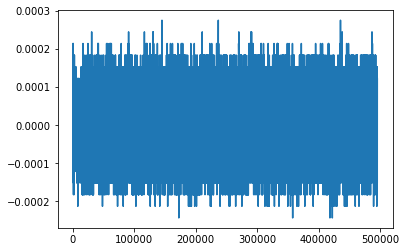

In [45]:
plt.plot(packets[2, :])